# Lending Club Data Set Prediction

In [527]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import ttest_ind_from_stats
df= pd.read_csv('/Users/ankit/Desktop/Springboard dox/Python/2018_less.csv',low_memory=False)


# Understanding the various features (columns) of the dataset


In [528]:
print(df.info())
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Columns: 150 entries, id to settlement_term
dtypes: float64(63), int64(57), object(30)
memory usage: 11.4+ MB
None


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=150)

In [529]:
print(df.shape)

(9998, 150)


In [530]:
#Drop columns with data NaN

In [531]:
#df=df.dropna(axis=1)

In [532]:
#df.shape

In [533]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,145217616,NaN,10000,10000,10000,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,145248657,NaN,4000,4000,4000,36 months,23.4%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,145638579,NaN,5000,5000,5000,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,145592722,NaN,23000,23000,23000,60 months,20.89%,620.81,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,144858623,NaN,8000,8000,8000,36 months,23.4%,311.35,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Wrangling

In [534]:
#rename the column names

df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})


In [535]:
df.head()
print(type(df['interest_rate'][0]))

<class 'str'>


In [536]:
#removing percentage sign from the interest_rate
df.interest_rate = df.interest_rate.str.replace('%', '')
print(df.interest_rate.head())

0    10.33
1     23.4
2    17.97
3    20.89
4     23.4
Name: interest_rate, dtype: object


In [537]:
#remove months from term colums
df.term = df.term.str.replace('months', '')
df.term.head()

0    36 
1    36 
2    36 
3    60 
4    36 
Name: term, dtype: object

In [538]:
#selecting unique column as index

df['id'].is_unique

True

In [573]:
df.set_index('id')
df.drop(['member_id'],axis=1,inplace=True)

In [574]:
print(df.columns)
df.info()

Index(['id', 'loan_amount', 'funded_amount', 'investor_funds', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_condition',
       'income_category', 'loan_condition_int'],
      dtype='object', length=152)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Columns: 152 entries, id to loan_condition_int
dtypes: float64(62), int64(58), object(32)
memory usage: 11.6+ MB


In [575]:
df.corr()

,id,loan_amount,funded_amount,investor_funds,installment,annual_income,desc,dti,delinq_2yrs,fico_range_low,...,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,loan_condition_int
id,1.000000,-0.053255,-0.053255,-0.053172,-0.045424,0.016291,NaN,-0.020629,-0.019739,0.004199,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,-0.034710
loan_amount,-0.053255,1.000000,1.000000,0.999996,0.940634,0.279051,NaN,0.058237,-0.009645,0.093668,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,0.037162
funded_amount,-0.053255,1.000000,1.000000,0.999996,0.940634,0.279051,NaN,0.058237,-0.009645,0.093668,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,0.037162
investor_funds,-0.053172,0.999996,0.999996,1.000000,0.940625,0.279035,NaN,0.058271,-0.009634,0.093638,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,0.037190
installment,-0.045424,0.940634,0.940634,0.940625,1.000000,0.273672,NaN,0.061349,0.005219,0.036782,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,0.045463
annual_income,0.016291,0.279051,0.279051,0.279035,0.273672,1.000000,NaN,-0.149904,0.044302,0.026413,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,-1.0,-0.002271
desc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,-0.020629,0.058237,0.058237,0.058271,0.061349,-0.149904,NaN,1.000000,-0.008190,0.001431,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,1.0,-0.005443
delinq_2yrs,-0.019739,-0.009645,-0.009645,-0.009634,0.005219,0.044302,NaN,-0.008190,1.000000,-0.174464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006025
fico_range_low,0.004199,0.093668,0.093668,0.093638,0.036782,0.026413,NaN,0.001431,-0.174464,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,1.0,-0.029527


In [542]:
df["loan_status"].value_counts()


Current               8666
Fully Paid             980
Late (31-120 days)     169
Charged Off             98
In Grace Period         65
Late (16-30 days)       19
Default                  1
Name: loan_status, dtype: int64

In [543]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

# Pie Chart for Loan Conditions

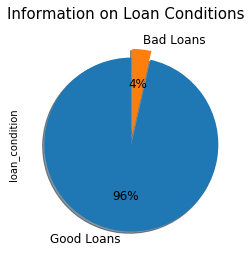

In [544]:
#f, ax = plt.subplots(1,2, figsize=(16,8))

labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=15)

df["loan_condition"].value_counts().plot.pie(explode=[0,0.10],autopct='%1.0f%%', shadow=True,labels=labels, fontsize=12, startangle=90)




In [545]:
df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

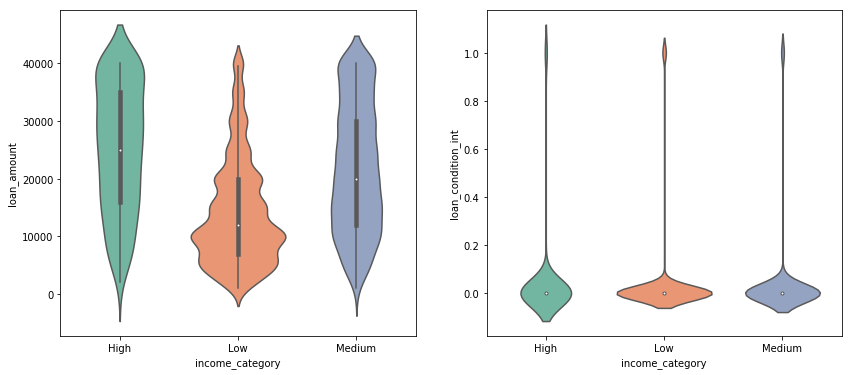

In [546]:
# Let's transform the column loan_condition into integrers.

lst = [df]
df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
df['loan_condition_int'] = df['loan_condition_int'].astype(int)
fig, (ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)


In [547]:
#df.corr(loan_status,annual_income)

# Loan Condition V/s Income

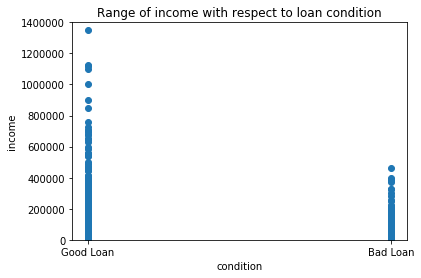

In [548]:
plt.scatter(df.loan_condition,df.annual_income)
plt.xlabel("condition")
plt.ylabel("income")
plt.ylim(0,1400000)
plt.title("Range of income with respect to loan condition")
plt.show()

# Loan Consition V/s Fico Scores

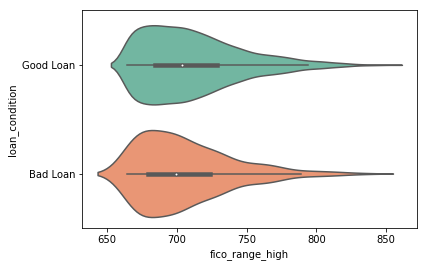

In [549]:
sns.violinplot(x="fico_range_high", y="loan_condition", data=df, palette="Set2" )
plt.show()

The mean of the good loans is more than 700 and most of the values of fico_score lies near 700 score hence the fico score for good loans should be closer to 700.

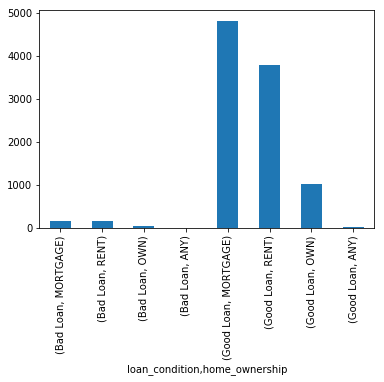

In [550]:
df.home_ownership.groupby(df.loan_condition).value_counts().plot.bar()
plt.show()

Loan Grades and Subgrades are assigned by Lending Club based on the borrower’s credit worthiness and also on some variables specific to that Loan.

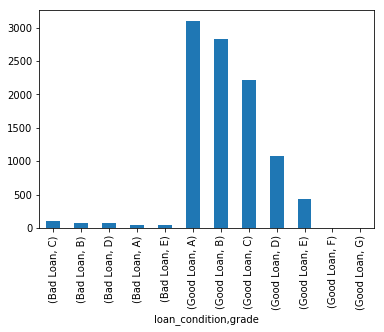

In [551]:
df.grade.groupby(df.loan_condition).value_counts().plot.bar()
plt.show()

The majority of loans is either graded as B or C — together these correspond to more than 50% of the loan population.
While there is a considerable amount of A graded or “prime” loans (~17%), there is a small amount of E graded, or “uncollectible” loans (~0,06%). Which is a good sign for Lending Club.
But, are these the right grades?

# Statistical Inferences of the Dataset

Text(0.5, 1.0, 'Total committed by Investors')

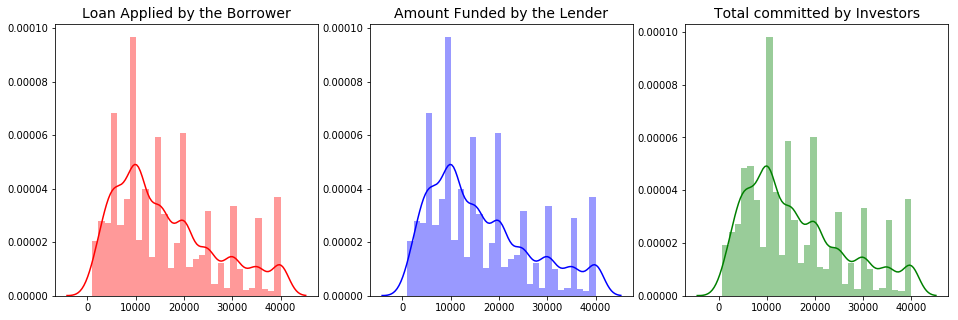

In [552]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = df["loan_amount"].values
funded_amount = df["funded_amount"].values
investor_funds = df["investor_funds"].values
sns.distplot(loan_amount, ax=ax[0], color="red")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="blue")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="green")
ax[2].set_title("Total committed by Investors", fontsize=14)

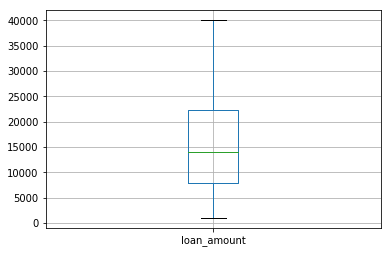

In [553]:
df.boxplot(column='loan_amount')


In [554]:
mean =np.mean(df.funded_amount)
std =np.std(df.funded_amount)
print(mean)
print(std)

16162.387477495498
10364.294412830544


# Null hypothesis: The mean interest rates offered for A grade loans are less than the other grades.

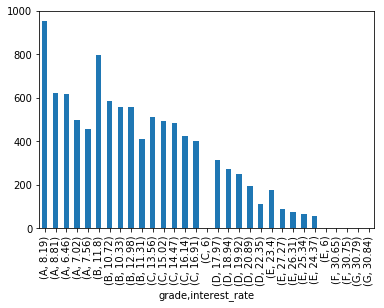

In [555]:
df.interest_rate.groupby(df.grade).value_counts().plot.bar()
plt.show()


In [621]:
def loan_sampler_A(n):
    return np.random.choice(df.interest_rate[df.grade=='A'].astype('float64'), n)
def loan_sampler_other(n):
    return np.random.choice(df.interest_rate[df.grade!='A'].astype('float64'),n)

In [622]:
seed(47)
size=50
sample1 = loan_sampler_A(size).astype('float64')
sample2 = loan_sampler_other(size).astype('float64')
print(sample1)
type(sample1[0])

[8.19 7.56 8.19 8.19 8.19 7.02 8.81 8.19 7.02 7.56 7.02 7.02 8.81 7.02
 6.46 6.46 8.19 8.19 8.19 6.46 8.81 6.46 7.02 8.81 6.46 6.46 7.56 8.81
 6.46 8.19 8.81 6.46 8.19 6.46 7.56 8.19 7.56 6.46 8.19 8.19 8.19 6.46
 6.46 8.19 8.81 7.56 8.81 8.19 8.81 8.81]


numpy.float64

In [631]:
mean_A = np.mean(sample1)
mean_other = np.mean(sample2)
std_A=np.std(sample1)
std_other=np.std(sample2)
seed(47)
N=500
# take your samples here
total_mean_A=np.empty(N)
total_mean_other=np.empty(N)
for i in range (N):
    total_mean_A[i]=np.mean(loan_sampler_A(size))
    total_mean_other[i]=np.mean(loan_sampler_other(size))
print(total_mean_A)

[7.6828 7.6868 7.7728 7.8244 7.6622 7.7878 7.6536 7.7286 7.8822 7.7578
 7.8998 7.6226 7.8678 7.4694 7.703  7.6376 7.6452 7.7254 7.661  7.6572
 7.667  7.6802 7.8544 7.8242 7.7028 7.7286 7.7004 7.837  7.7786 7.6996
 7.5488 7.5848 7.8066 7.841  7.5222 7.835  7.8146 7.8404 7.7468 7.6938
 7.8484 7.6784 7.6732 7.6906 7.564  7.7134 7.6546 7.4842 7.6642 7.6758
 7.6992 7.7558 7.6474 7.8198 7.7156 7.547  7.9496 7.6148 7.5982 7.6966
 7.8094 7.8588 7.6594 7.6218 7.6588 7.7736 7.857  7.5412 7.795  7.6252
 7.5372 7.5402 7.6834 7.5872 7.6564 7.6294 7.612  7.5392 7.6696 7.6208
 7.7104 7.7894 7.6116 7.7876 7.6506 7.9998 7.5294 7.6928 7.7948 7.574
 7.4804 7.8662 7.707  7.6342 7.7942 7.6354 7.6688 7.7756 7.5286 7.8088
 7.7226 7.5412 7.4468 7.729  7.8068 7.8126 7.6734 7.8328 7.7592 7.6262
 7.7608 7.5474 7.701  7.4544 7.4148 7.5536 7.7644 7.6664 7.5732 7.5432
 7.5044 7.6248 7.5112 7.6706 7.7286 7.9118 7.812  7.802  7.6562 7.6434
 7.8608 7.7714 7.6566 7.528  7.7558 7.6212 7.6766 7.7194 7.6392 7.7508
 7.5752

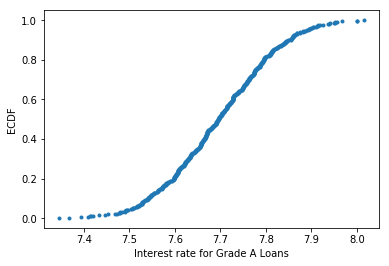

In [632]:
n=len(total_mean_A)
x=np.sort(total_mean_A)
y=np.arange(1,n+1)/n
plt.plot(x,y,marker='.',linestyle='none')
# Label the axes
plt.xlabel('Interest rate for Grade A Loans')
plt.ylabel('ECDF')
plt.show()

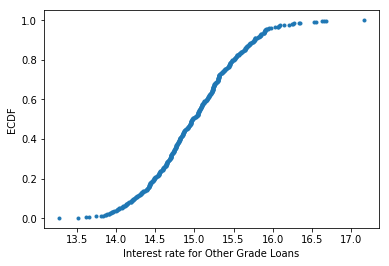

In [633]:
n=len(total_mean_other)
x=np.sort(total_mean_other)
y=np.arange(1,n+1)/n
plt.plot(x,y,marker='.',linestyle='none')
# Label the axes
plt.xlabel('Interest rate for Other Grade Loans')
plt.ylabel('ECDF')
plt.show()

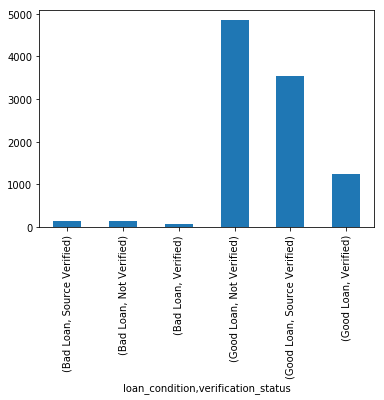

In [401]:
df.verification_status.groupby(df.loan_condition).value_counts().plot.bar()
plt.show()


The observation is quite unexpected as it was expected that people with verified status should have less charged off loans but it is the opposit. Hence,verification status does not give any clear idea of the impact on the loan condition. So we try to see in other way.


In [402]:
pd.crosstab(df ['verification_status'], df ['loan_condition'], margins=True)


loan_condition,Bad Loan,Good Loan,All
verification_status,,,
Not Verified,136,4854,4990
Source Verified,153,3535,3688
Verified,63,1257,1320
All,352,9646,9998


This shows that 38.6% of the bad loans were not verified.

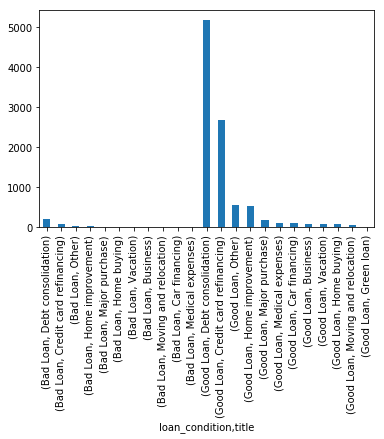

In [403]:
df.title.groupby(df.loan_condition).value_counts().plot.bar()
plt.show()

Most of the good loans are being observed for the purpose of debt consolidation and credit card refinance category which can be considered as a safe category

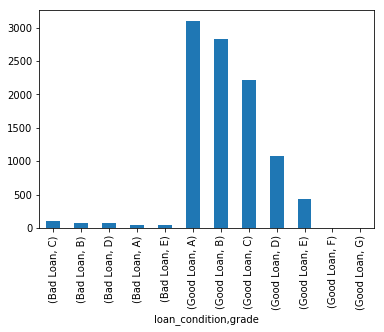

In [404]:
df.grade.groupby(df.loan_condition).value_counts().plot.bar()
plt.show()

Number of bad loans were less in the category A jobs and it had more number of good loans as compared to the other category.

# Correlation among the features

Few important columns are selected from the full dataset based on the significance and the data present prior to the approval of the loan. The columns are saved in 'imp_columns' list.

Now we will see the correlation between the numerical data

In [405]:
imp_columns=['member_id','loan_amount','funded_amount','term','interest_rate','grade','emp_length','home_ownership','annual_income','verification_status','loan_status','loan_condition','purpose','title','addr_state','fico_range_low','fico_range_high','avg_cur_bal','income_category']
df2=df[imp_columns]
df2.corr()

,member_id,loan_amount,funded_amount,annual_income,fico_range_low,fico_range_high,avg_cur_bal
member_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,NaN,1.000000,1.000000,0.279051,0.093668,0.093668,0.200978
funded_amount,NaN,1.000000,1.000000,0.279051,0.093668,0.093668,0.200978
annual_income,NaN,0.279051,0.279051,1.000000,0.026413,0.026414,0.278957
fico_range_low,NaN,0.093668,0.093668,0.026413,1.000000,1.000000,0.075313
fico_range_high,NaN,0.093668,0.093668,0.026414,1.000000,1.000000,0.075310
avg_cur_bal,NaN,0.200978,0.200978,0.278957,0.075313,0.075310,1.000000


Average current balance,annual income and fico scores have strong positive correlation with the loan amount .

Correlation between all the important columns:

In [406]:
df2.apply(lambda x: x.factorize()[0]).corr()
corr_imp=df2.apply(lambda x: x.factorize()[0]).corr()


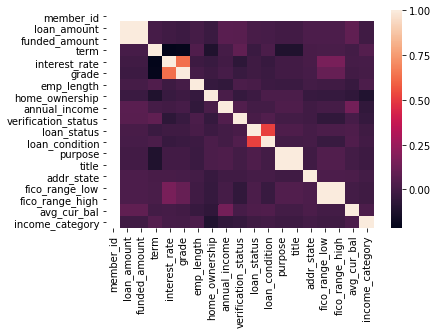

In [407]:
import seaborn as sns

sns.heatmap(corr_imp, 
        xticklabels=corr_imp.columns,
        yticklabels=corr_imp.columns)

# Data Preparation for Model Building

In [410]:
# Convert all non-numeric values to number
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
imp_columns=['member_id','loan_amount','funded_amount','term','interest_rate','grade','emp_length','home_ownership','annual_income','verification_status','loan_status','loan_condition','purpose','title','addr_state','fico_range_low','fico_range_high','avg_cur_bal','income_category']

for var in imp_columns:
    le = LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes


id                                              int64
member_id                                       int64
loan_amount                                     int64
funded_amount                                   int64
investor_funds                                  int64
term                                            int64
interest_rate                                   int64
installment                                   float64
grade                                           int64
sub_grade                                      object
emp_title                                      object
emp_length                                      int64
home_ownership                                  int64
annual_income                                   int64
verification_status                             int64
issue_d                                        object
loan_status                                     int64
pymnt_plan                                     object
url                         

In [417]:
from sklearn import preprocessing
target_name='loan_condition'
y= df.loan_condition
y = y.isin(['Good Loan']).astype('int')
X= df.drop(target_name,axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [418]:
knn.fit(X_train, y_train)

ValueError: could not convert string to float: 'B1'

In [419]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# statsmodels works nicely with pandas dataframes
m = ols('loan_amount ~ interest_rate',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.067
Date:                Tue, 15 Oct 2019   Prob (F-statistic):            0.00261
Time:                        18:06:36   Log-Likelihood:                -66642.
No. Observations:                9998   AIC:                         1.333e+05
Df Residuals:                    9996   BIC:                         1.333e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       308.6556      4.225     73.060

In [420]:
m1 = ols('loan_amount ~ verification_status',df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.204
Date:                Tue, 15 Oct 2019   Prob (F-statistic):             0.0404
Time:                        18:06:39   Log-Likelihood:                -66644.
No. Observations:                9998   AIC:                         1.333e+05
Df Residuals:                    9996   BIC:                         1.333e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             300.7926    

In [421]:
m = ols('loan_amount ~ fico_range_high',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02562
Date:                Tue, 15 Oct 2019   Prob (F-statistic):              0.873
Time:                        18:06:41   Log-Likelihood:                -66646.
No. Observations:                9998   AIC:                         1.333e+05
Df Residuals:                    9996   BIC:                         1.333e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         296.7845      3.702     

In [423]:
df.select_dtypes('object').head()


,sub_grade,emp_title,issue_d,pymnt_plan,url,zip_code,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,B1,NaN,Dec-2018,n,https://lendingclub.com/browse/loanDetail.acti...,974xx,Jan-1996,38%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,NaN,NaN,NaN
1,E1,Security,Dec-2018,n,https://lendingclub.com/browse/loanDetail.acti...,070xx,Sep-2006,19.2%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,NaN,NaN,NaN
2,D1,Administrative,Dec-2018,n,https://lendingclub.com/browse/loanDetail.acti...,490xx,Apr-2011,19.1%,w,Jun-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,NaN,NaN,NaN
3,D4,Operator,Dec-2018,n,https://lendingclub.com/browse/loanDetail.acti...,672xx,Feb-1997,13%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,NaN,NaN,NaN
4,E1,Manager,Dec-2018,n,https://lendingclub.com/browse/loanDetail.acti...,357xx,Jan-1995,81.3%,w,Jul-2019,Sep-2019,Aug-2019,Individual,NaN,NaN,N,N,NaN,NaN,NaN
